Estimated values: [0.34375000000000006, 0.595238095238095]
Total reward collected: 111


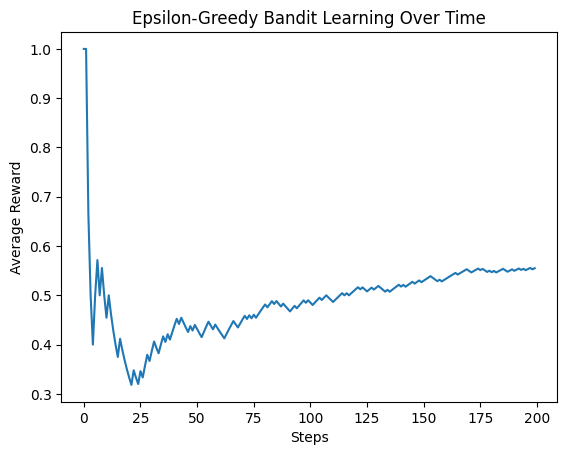

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# The real (hidden) reward rates for each action (A = 30%, B = 60%)
true_rewards = [0.3, 0.6]

# Chance of exploring a random action instead of picking the best one
epsilon = 0.1  # 10% explore, 90% exploit

# Number of steps (like 200 customers we're showing promos to)
steps = 200

# Total rewards collected
total_rewards = 0

# List to store how well we're doing over time (for plotting)
average_rewards = []

# Count how many times we tried each action
counts = [0, 0]

# Our guesses (estimates) of how good each action is — starts at 0
estimated_values = [0.0, 0.0]

# Main loop — one step = one customer interaction
for step in range(steps):

    # Randomly decide: should we explore or exploit?
    if np.random.rand() < epsilon:
        # Explore: try a random action (0 or 1)
        action = np.random.choice([0, 1])
    else:
        # Exploit: pick the action with the highest estimated reward
        action = np.argmax(estimated_values)

    # Simulate customer response based on true reward (hidden from agent)
    # If random number < true reward → success (reward = 1), else 0
    reward = 1 if np.random.rand() < true_rewards[action] else 0

    # Update how many times we chose this action
    counts[action] += 1

    # Update our guess (estimated value) for this action using running average
    estimated_values[action] += (reward - estimated_values[action]) / counts[action]

    # Track how we're doing overall
    total_rewards += reward
    average_rewards.append(total_rewards / (step + 1))

# Show our final estimates and total reward earned
print("Estimated values:", estimated_values)
print("Total reward collected:", total_rewards)

# Plot how our average reward improved over time
plt.plot(average_rewards)
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy Bandit Learning Over Time")
plt.show()